# 보스턴 집값 예측

In [1]:
import tensorflow as tf

In [204]:
# 모듈로딩
from keras import Sequential # 모델 객체
from keras.layers import Dense,Input,Dropout # 모델 레이어(층)
from keras.datasets.boston_housing import load_data # 데이터셋
import numpy as np

In [10]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test)=load_data()

In [11]:
# 데이터 모양 확인
print(f"x_train => {x_train.shape}, x_test => {x_test.shape}")

x_train => (404, 13), x_test => (102, 13)


In [14]:
# 데이터 모양 확인
print(f"x_train => {y_train.shape}, x_test => {y_test.shape}")

x_train => (404,), x_test => (102,)


In [16]:
train, test =load_data()

In [21]:
test[1].shape

(102,)

#### [1] 데이터 전처리
- 특성(Feature) 전처리
  - 수치 데이터 : 값의 범위
  - 문자 데이터 : 수치화

In [186]:
# 표준화
from sklearn.preprocessing import StandardScaler,minmax_scale,RobustScaler

scaler=StandardScaler()
scaler.fit(x_train)
print(scaler.mean_)
print(scaler.scale_)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [188]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

### [2] NN Model 실습
- (1) 모델구성
- (2) 모델생성
- (3) 학습
- (4) 평가
- (5) 테스트

#### [2-1] 모델 구성
- 입력 데이터 => 13개 Features
- 출력 데이터 => 1개 집값 -> 회귀
- 층을 한 개만 한다고 정함
  - Dense Layer : node=1, af=linear, input_shape=(13,) 

In [210]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model=Sequential(name='Boston')

In [211]:
# Layer 추가하기
model.add(Input(shape=(13,),name='input'))
model.add(Dense(30,activation='relu',name='hidden-1'))
# model.add(Dense(30,activation='relu',name='hidden-1',input_shape=(13,)))

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu',name='hidden-2'))
model.add(Dense(1,activation='linear',name='output'))

# 출력층 전의 은닉충에는 activate는 relu로 정해둔다

In [212]:
# 모델 구성 확인
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 30)                420       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 hidden-2 (Dense)            (None, 10)                310       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성
- Sequential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정 => 오차계산, 최적화, 성능평가
  - 오차 계산 함수 설정 => loss
    - 회귀 => MSE, MAE, RMSE
    - 분류 => crossentropy(이진분류: binary_crossentropy,  
                          다중분류: categotical_crossentropy,
                          원핫인코딩X: sparse_categorical_crossentropy)
  - W, B 최적화 방식 설정 => optimizer
    - 기본값: rmsprop
    - 종류 : adam, momonent, ... 최적화 클래스 이름 문자열 입력
  - 모델의 성능 측정 항목 설정 => metrics
    - 기본값: loss
    - 클래스 이름 문자열 입력
- 파라미터 값들
  - str 타입으로 입력 가능
  - 객체 타입으로 입력 가능

In [102]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

#### [2-3] 모델학습
- fit() 메서드
  - 입력 파라미터
  - 반환값 => History 객체
    - 형태 : dict
    - 기본 : 학습 데이터에 대한 loss 값 저장
  - epochs=1 : 처음부터 끝까지 학습횟수
  - batch_size=32 : 학습량 크기
  - validation_split : 학습 데이터의 일부를 검증용으로 분리 0.0~1.0
  - validation_data : (테스트 데이터, 테스트 타켓)
  - callback: 학습 시 발생하는 이벤트 처리 함수 등록

In [112]:
result=model.fit(x_train,y_train,
                epochs=5,
                batch_size=5,
                validation_split=0.2)

Epoch 1/5
65/65 [==============================] - 0s 5ms/step - loss: 7944.8481 - mae: 69.8420 - val_loss: 5439.1846 - val_mae: 59.3410
Epoch 2/5
65/65 [==============================] - 0s 2ms/step - loss: 6932.9785 - mae: 65.0600 - val_loss: 4751.6831 - val_mae: 55.0450
Epoch 3/5
65/65 [==============================] - 0s 1ms/step - loss: 6052.5166 - mae: 61.0743 - val_loss: 4077.7854 - val_mae: 51.3220
Epoch 4/5
65/65 [==============================] - 0s 1ms/step - loss: 5244.6802 - mae: 56.4402 - val_loss: 3529.4421 - val_mae: 47.7974
Epoch 5/5
65/65 [==============================] - 0s 1ms/step - loss: 4535.4438 - mae: 52.3248 - val_loss: 3012.4341 - val_mae: 43.9508


- Epoch 1/5 => 총 5번의 Epoch 중에 1번 했음
- 81/81은 배치 사이즈를 몇번 반복할지 정해줌

In [113]:
# 학습 후 학습 결과 체크 => History 객체
type(result)

keras.callbacks.History

In [114]:
result.params

{'verbose': 1, 'epochs': 5, 'steps': 65}

In [115]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [116]:
result.history.get('loss')

[7944.84814453125,
 6932.978515625,
 6052.5166015625,
 5244.68017578125,
 4535.44384765625]

In [117]:
result.history.get('mae')

[69.8420181274414,
 65.05996704101562,
 61.07427215576172,
 56.44017791748047,
 52.32478713989258]

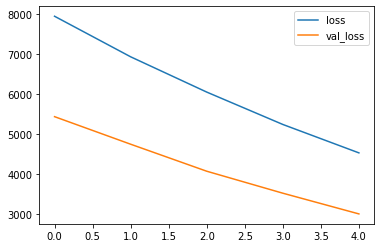

In [119]:
# loss 시각화
import matplotlib.pyplot as plt

plt.plot(result.epoch,result.history['loss'],label='loss')
plt.plot(result.epoch,result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [90]:
import pandas as pd
pd.DataFrame(model.predict(x_test),y_test)

4/4 [==============================] - 0s 1ms/step


,0
7.2,32.500584
18.8,131.586365
19.0,117.333572
27.0,109.898392
22.2,119.557564
...,...
21.9,114.926407
24.1,109.959930
50.0,123.053955
26.7,126.069710


##### 연습해보기

In [135]:
result=model.fit(x_train,y_train,
                epochs=1000,
                batch_size=10,
                validation_data=(x_test,y_test))

Epoch 1/1000
41/41 [==============================] - 0s 3ms/step - loss: 32.7252 - mae: 4.2017 - val_loss: 33.8655 - val_mae: 4.1476
Epoch 2/1000
41/41 [==============================] - 0s 2ms/step - loss: 31.8143 - mae: 4.1351 - val_loss: 35.3570 - val_mae: 4.3714
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 32.4551 - mae: 4.2306 - val_loss: 34.2025 - val_mae: 4.2648
Epoch 4/1000
41/41 [==============================] - 0s 2ms/step - loss: 31.6387 - mae: 4.1849 - val_loss: 34.8060 - val_mae: 4.1802
Epoch 5/1000
41/41 [==============================] - 0s 2ms/step - loss: 31.8934 - mae: 4.0965 - val_loss: 34.7435 - val_mae: 4.3252
Epoch 6/1000
41/41 [==============================] - 0s 1ms/step - loss: 32.9097 - mae: 4.2624 - val_loss: 35.4950 - val_mae: 4.3845
Epoch 7/1000
41/41 [==============================] - 0s 2ms/step - loss: 32.4972 - mae: 4.2250 - val_loss: 33.6442 - val_mae: 4.1883
Epoch 8/1000
41/41 [==============================] - 0s 2ms/s

In [136]:
# 학습 후 학습 결과 체크 => History 객체
type(result)

keras.callbacks.History

In [137]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [138]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [139]:
result.history.get('loss')

[32.72521209716797,
 31.814260482788086,
 32.455074310302734,
 31.638683319091797,
 31.893436431884766,
 32.90971755981445,
 32.49717330932617,
 31.84803581237793,
 32.889137268066406,
 32.649452209472656,
 32.127098083496094,
 32.37868118286133,
 31.6866512298584,
 32.040618896484375,
 31.858997344970703,
 31.543851852416992,
 31.843101501464844,
 32.11511993408203,
 31.167037963867188,
 32.57475662231445,
 31.46902847290039,
 31.993263244628906,
 31.483110427856445,
 31.7313289642334,
 32.23923873901367,
 31.78409194946289,
 32.23683166503906,
 31.790552139282227,
 32.447139739990234,
 31.397424697875977,
 31.233154296875,
 31.332599639892578,
 32.24256134033203,
 31.35312843322754,
 32.09775161743164,
 31.498798370361328,
 31.252161026000977,
 31.551151275634766,
 31.46144676208496,
 31.027856826782227,
 31.962373733520508,
 30.693090438842773,
 31.652788162231445,
 33.70015335083008,
 31.145652770996094,
 30.8301944732666,
 30.84287452697754,
 30.893756866455078,
 31.64561843872070

In [140]:
result.history.get('mae')

[4.2017059326171875,
 4.135112285614014,
 4.2305707931518555,
 4.184939861297607,
 4.09651517868042,
 4.262397766113281,
 4.224978446960449,
 4.181262493133545,
 4.285886287689209,
 4.20854377746582,
 4.194411277770996,
 4.147326946258545,
 4.230040550231934,
 4.151330471038818,
 4.2431488037109375,
 4.1637444496154785,
 4.165985107421875,
 4.253113269805908,
 4.141421318054199,
 4.228762626647949,
 4.104268550872803,
 4.211550712585449,
 4.139573097229004,
 4.146878719329834,
 4.230478286743164,
 4.126949787139893,
 4.168731212615967,
 4.195338249206543,
 4.183816909790039,
 4.145482540130615,
 4.144643306732178,
 4.1453094482421875,
 4.165963649749756,
 4.1398491859436035,
 4.161834239959717,
 4.1243896484375,
 4.110116958618164,
 4.1349592208862305,
 4.149392604827881,
 4.168283939361572,
 4.139991283416748,
 4.030506134033203,
 4.112459659576416,
 4.28004789352417,
 4.105988502502441,
 4.108926773071289,
 4.061021327972412,
 4.0901875495910645,
 4.157751560211182,
 4.10266780853271

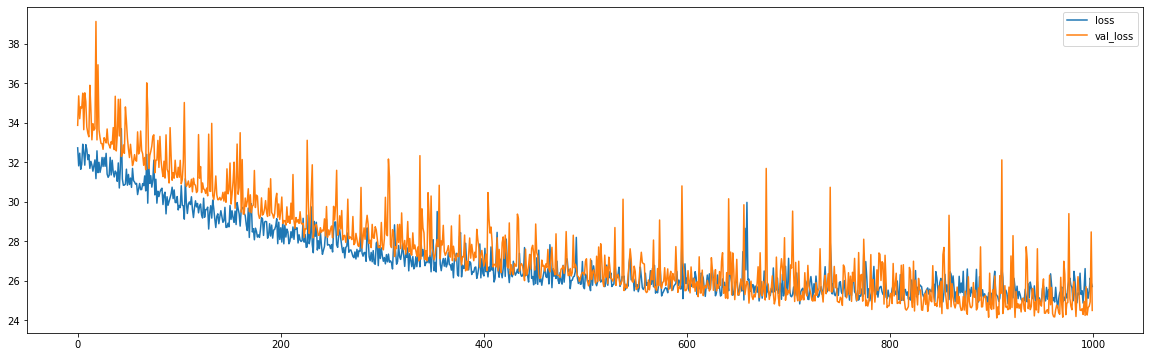

In [142]:
# loss 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(result.epoch,result.history['loss'],label='loss')
plt.plot(result.epoch,result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

##### EarlyStopping

In [143]:
# 검증데이터에 대한 loss값 3번 연속 개선되지 않으면 학습중지
from keras.callbacks import EarlyStopping

stopCB=EarlyStopping(monitor='val_loss',patience=3)

In [145]:
result=model.fit(x_train,y_train,
                epochs=1000,
                batch_size=10,
                validation_data=(x_test,y_test),
                callbacks=stopCB)

Epoch 1/1000
41/41 [==============================] - 0s 2ms/step - loss: 26.4037 - mae: 3.6103 - val_loss: 24.5204 - val_mae: 3.5555
Epoch 2/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.0856 - mae: 3.4443 - val_loss: 26.2961 - val_mae: 3.7464
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.3911 - mae: 3.5202 - val_loss: 24.3708 - val_mae: 3.5353
Epoch 4/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.6572 - mae: 3.5238 - val_loss: 24.3493 - val_mae: 3.5370
Epoch 5/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9387 - mae: 3.4571 - val_loss: 24.5185 - val_mae: 3.5521
Epoch 6/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9426 - mae: 3.4829 - val_loss: 24.7552 - val_mae: 3.5947
Epoch 7/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.7093 - mae: 3.4695 - val_loss: 25.5940 - val_mae: 3.6960


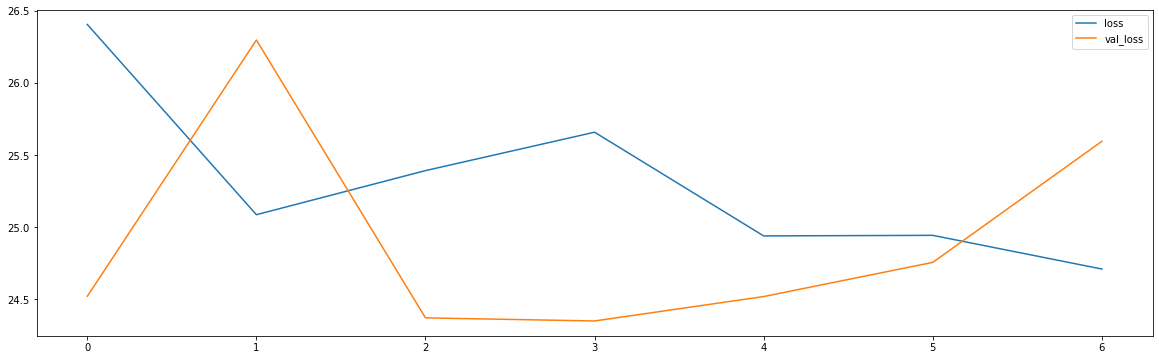

In [146]:
# loss 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(result.epoch,result.history['loss'],label='loss')
plt.plot(result.epoch,result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

#### [2-4] 모델 평가
- evaluate() 메서드
  - 파라미터 : test_data,test_target
  - 반환값 : loss, compile()의 metrics에서 설정한 항목값

In [148]:
eRet=model.evaluate(x_test,y_test)
eRet

4/4 [==============================] - 0s 1ms/step - loss: 25.5940 - mae: 3.6960


[25.593975067138672, 3.696018695831299]

#### [2-5] 모델 예측
- predict()

In [183]:
np.column_stack((model.predict(x_test),y_test))

4/4 [==============================] - 0s 1ms/step


array([[-245.43792725,    7.2       ],
       [-179.35792542,   18.8       ],
       [-180.27256775,   19.        ],
       [-155.79841614,   27.        ],
       [-183.44337463,   22.2       ],
       [-180.38299561,   24.5       ],
       [-166.40065002,   31.2       ],
       [-177.00592041,   22.9       ],
       [-182.35293579,   20.5       ],
       [-214.8500824 ,   23.2       ],
       [-126.05361938,   18.6       ],
       [-183.92703247,   14.5       ],
       [-179.74916077,   17.8       ],
       [-180.22592163,   50.        ],
       [-206.46783447,   20.8       ],
       [-173.33731079,   24.3       ],
       [-170.26292419,   24.2       ],
       [-164.53245544,   19.8       ],
       [-214.06776428,   19.1       ],
       [-214.01779175,   22.7       ],
       [-206.32461548,   12.        ],
       [-261.30575562,   10.2       ],
       [-176.47729492,   20.        ],
       [-177.93948364,   18.5       ],
       [-166.78981018,   20.9       ],
       [-217.15718079,   

In [166]:
y_test.shape

(102,)

In [168]:
model.predict(x_test).shape

4/4 [==============================] - 0s 2ms/step


(102, 1)